In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as split_data

In [2]:
dataset = pd.read_csv('Wine.csv')
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [5]:
scaler = StandardScaler()

In [6]:
x = scaler.fit_transform(x)

In [7]:
total_mean = np.mean(x, axis=0)

In [8]:
class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None
    
    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)
        
        #Scatter classes
        mean_total = np.mean(X, axis= 0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))

        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis= 0)
            SW += (X_c - mean_c).T @ (X_c - mean_c)

            samples_inclass = X_c.shape[0]
            mean_difference = (mean_c - mean_total).reshape((n_features, 1))
            SB += samples_inclass * mean_difference @ mean_difference.T

        vector = np.linalg.inv(SW) @ SB
        eigenvalues, eigenvectors = np.linalg.eig(vector)
        eigenvectors = eigenvectors.T
        indices = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[indices]
        eigenvectors = eigenvectors[indices]
        self.linear_discriminants = eigenvectors[:self.n_components]

    def transform(self, X):
        return X @ self.linear_discriminants.T

In [9]:
lda = LDA(3)

In [10]:
lda.fit(x, y)

In [12]:
X_transformed = lda.transform(x)

In [13]:
x1 = X_transformed[:, 0]
x2 = X_transformed[:, 1]

In [14]:
from matplotlib import pyplot as plt

S:\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


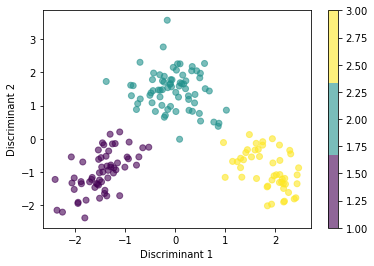

In [15]:
plt.scatter(x1, x2, c= y, alpha= 0.6,
            cmap= plt.cm.get_cmap('viridis', 3))
plt.xlabel('Discriminant 1')
plt.ylabel('Discriminant 2')
plt.colorbar()
plt.show()